In [1]:
import geopandas as gpd
import ee
import geojson
import salem
import pyproj
import shapely
from pyproj import Geod, CRS
import pandas as pd
from geomet import wkt
from shapely import wkt
import sys
from dateutil import parser
import shapefile
import matplotlib.pyplot as plt
import cartopy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime
import seaborn as sns
import os
import platform
import sys
import subprocess
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#mport branca

#3D stuff
from IPython.core.display import display, HTML
from mpl_toolkits import mplot3d
import json

import geopandas as gpd
import geojson

from functools import partial
#import shapefile
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface

import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.io.img_tiles import StamenTerrain
from cartopy.io.img_tiles import GoogleTiles
from owslib.wmts import WebMapTileService

from matplotlib.path import Path
import matplotlib.patheffects as PathEffects
from matplotlib import patheffects
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [44]:
centralasia = gpd.read_file(
    "../data/cropdata/CentralAsia/CAWa_CropType_samples.shp")

durnast = gpd.read_file(
    "../data/cropdata/Bavaria/Test_area.shp")


#kenya1 = gpd.read_file(
 #   '../data/cropdata/Kenya/ref_african_crops_kenya_01_labels/ref_african_crops_kenya_01_labels_00/labels.geojson')
#kenya2 = gpd.read_file(
 #   '../data/cropdata/Kenya/ref_african_crops_kenya_01_labels/ref_african_crops_kenya_01_labels_01/labels.geojson')
#kenya3 = gpd.read_file(
 #   '../data/cropdata/Kenya/ref_african_crops_kenya_01_labels/ref_african_crops_kenya_01_labels_02/labels.geojson')
#kenya_merged = pd.concat([kenya1, kenya2, kenya3], axis=0)


# load shapefiles
country = salem.read_shapefile(
    '../data/shapefiles/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
counties_france = salem.read_shapefile(
    '../data/shapefiles/FRA_adm/FRA_adm1.shp')
bretagne = counties_france[counties_france.NAME_1 == 'Bretagne']
uzbekistan = country[country.SOVEREIGNT == 'Uzbekistan']
kenya = country[country.SOVEREIGNT == 'Kenya']
bavaria = salem.read_shapefile('../data/shapefiles/bavaria/regbez_ex.shp')

field_data1 = pd.read_excel('../py_files/testFIS/timeseries_L2A.xlsx')
field_data2 = pd.read_excel('../py_files/testFIS/timeseriesL1C.xlsx')

field_data3 = pd.read_excel('../py_files/testSHS/timeseries_L2A.xlsx')
field_data4 = pd.read_excel('../py_files/testSHS/timeseries_L1C.xlsx')

test_shp1 = gpd.read_file("../py_files/testSHS//labels_new.shp")
test_shp2 = gpd.read_file("../py_files/testFIS//labels_new.shp")

In [48]:
field_data2.tail()

,Unnamed: 0,date,channel,min,max,mean,stDev,clouds,id,year,crop_type
639,639,2018-02-16,14,0.2021,0.2220,0.213056,0.004600,1,b33fcbbaf152487881bc082c0f1906db,2018,115
640,640,2018-02-18,14,0.4487,0.5192,0.492499,0.018231,1,b33fcbbaf152487881bc082c0f1906db,2018,115
641,641,2018-02-21,14,0.1047,0.1176,0.111710,0.003801,0,b33fcbbaf152487881bc082c0f1906db,2018,115
642,642,2018-02-23,14,0.2168,0.2604,0.238383,0.011703,1,b33fcbbaf152487881bc082c0f1906db,2018,115
643,643,2018-02-26,14,0.1308,0.2962,0.188481,0.040789,1,b33fcbbaf152487881bc082c0f1906db,2018,115


In [14]:
test_shp1.head()

,year,FID_1,Feldnummer,Schlag,NC_ant,Nutz_ant,Flaeche,Feld,area,id,geometry
0,2018,DEBYLI8318000240,9,1,592,Dauergr. aus der Erzeugung genommen,3.16,DEBYLI8318000240 9 1,31624.842895,3ec84293fcaa4d51b7cc6b84db6f25cb,"POLYGON ((1295964.575 6172350.552, 1295956.253..."
1,2018,DEBYLI8310000056,52,1,115,Winterweizen (Weichweizen),0.73,DEBYLI8310000056 52 1,7254.605874,2f047e1422734c22a281db3ab2298ab2,"POLYGON ((1293515.009 6170326.268, 1293644.125..."


In [26]:
field_data3 = field_data3[field_data3.id == '3ec84293fcaa4d51b7cc6b84db6f25cb']
field_data4 = field_data4[field_data4.id == '3ec84293fcaa4d51b7cc6b84db6f25cb']

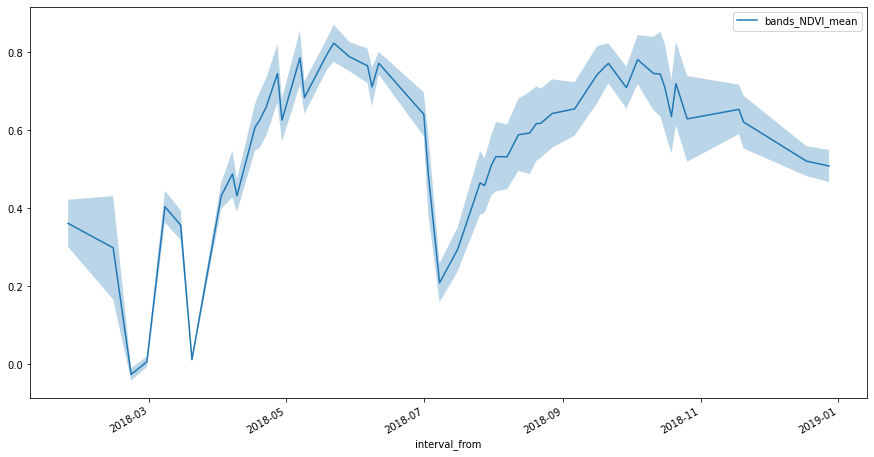

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))

series = field_data3

series.plot(
    ax=ax,
    x='interval_from',
    y='bands_NDVI_mean')

ax.fill_between(
    series.interval_from.values,
    series['bands_NDVI_mean'] - series['bands_NDVI_stDev'],
    series['bands_NDVI_mean'] + series['bands_NDVI_stDev'],
    alpha=0.3
)

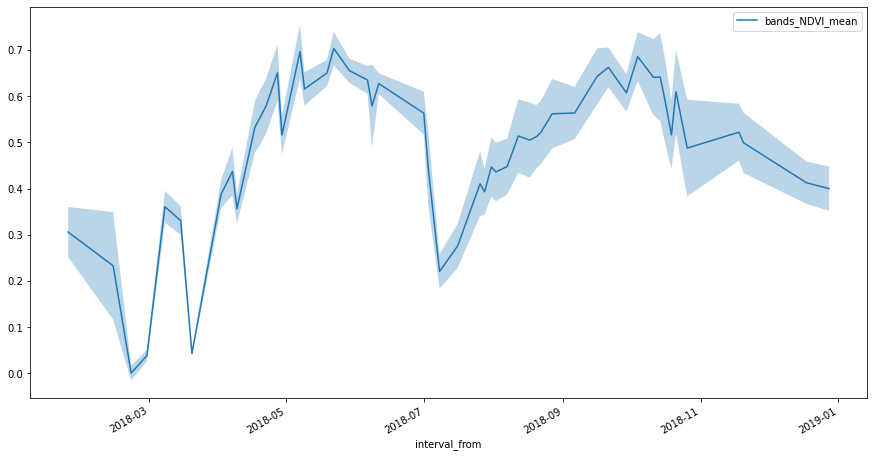

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

series = field_data4

series.plot(
    ax=ax,
    x='interval_from',
    y='bands_NDVI_mean')

ax.fill_between(
    series.interval_from.values,
    series['bands_NDVI_mean'] - series['bands_NDVI_stDev'],
    series['bands_NDVI_mean'] + series['bands_NDVI_stDev'],
    alpha=0.3
)

In [36]:
test_shp2.head()

,year,FID_1,Feldnummer,Schlag,NC_ant,Nutz_ant,Flaeche,Feld,area,id,geometry
0,2018,DEBYLI8318000240,9,1,592,Dauergr. aus der Erzeugung genommen,3.16,DEBYLI8318000240 9 1,31624.842895,f738b3f31c054a95a6ab0237d90958d0,"POLYGON ((1295964.575 6172350.552, 1295956.253..."
1,2018,DEBYLI8310000056,52,1,115,Winterweizen (Weichweizen),0.73,DEBYLI8310000056 52 1,7254.605874,a2d931fc63834316aa6e4f6b1ed63cfc,"POLYGON ((1293515.009 6170326.268, 1293644.125..."


In [42]:
field_data1 = field_data1[field_data1.id == 'f738b3f31c054a95a6ab0237d90958d0']
field_data2 = field_data2[field_data2.id == 'f738b3f31c054a95a6ab0237d90958d0']

field_data1 = field_data1[field_data1.clouds != 1]
field_data2 = field_data2[field_data2.clouds != 1]

In [43]:
field_data2.head()

,Unnamed: 0,date,channel,min,max,mean,stDev,clouds,id,year,crop_type


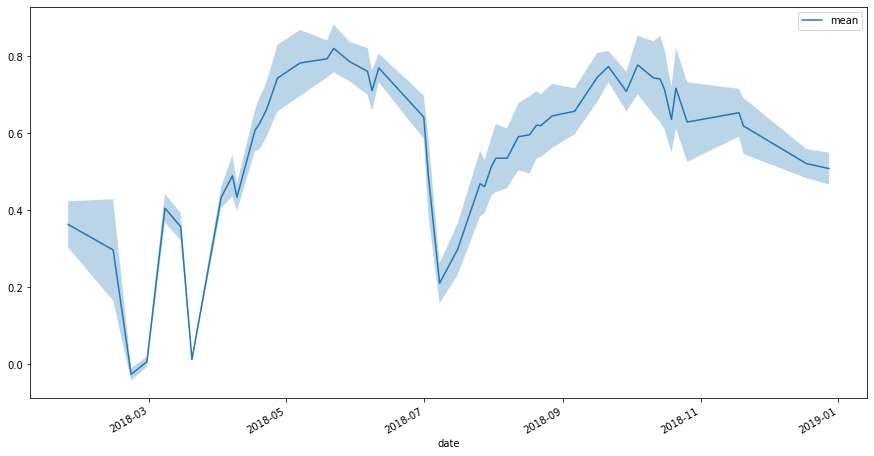

In [30]:
fig, ax = plt.subplots(figsize=(15, 8))

series = field_data1[field_data1.channel == 1]

series.plot(
    ax=ax,
    x='date',
    y='mean')

ax.fill_between(
    series.date.values,
    series['mean'] - series['stDev'],
    series['mean'] + series['stDev'],
    alpha=0.3
)

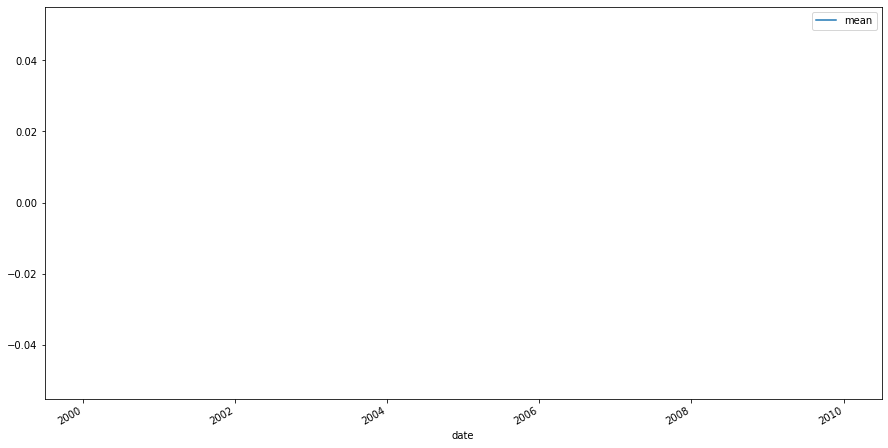

In [31]:
fig, ax = plt.subplots(figsize=(15, 8))

series = field_data2[field_data2.channel == 1]

series.plot(
    ax=ax,
    x='date',
    y='mean')

ax.fill_between(
    series.date.values,
    series['mean'] - series['stDev'],
    series['mean'] + series['stDev'],
    alpha=0.3
)

In [32]:
field_data2.head()

,Unnamed: 0,date,channel,min,max,mean,stDev,clouds,id,year,crop_type


In [ ]:
# get the map from a predefined grid
grid = salem.mercator_grid(transverse=False, center_ll=(15., 28.),
                           extent=(12e6, 8e6))
smap = salem.Map(grid)

# Add the background (other resolutions include: 'mr', 'hr')
# smap.set_rgb(natural_earth='lr')
#smap.set_points(11, 48)
smap.set_shapefile(bavaria, facecolor='deepskyblue', linewidth=0)
smap.set_shapefile(bretagne, facecolor='blue', linewidth=0)
smap.set_shapefile(uzbekistan, facecolor='turquoise', linewidth=0)
smap.set_shapefile(kenya, facecolor='green', linewidth=0)
# done!
smap.set_scale_bar(location=(0.87, 0.04), add_bbox=True)
smap.visualize()
plt.savefig('crop_world.pdf')
plt.show()

In [ ]:
# https://www.net-analysis.com/blog/cartopylayout.html

kenya_merged['Year'] = 2019
kenya_merged.to_file('Kenya_labels/Kenya_labels_PlantVillage.shp')